<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Module 2: Neural Networks with TensorFlow and Keras**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 2 Material

* **Part 2.1: Introduction to Neural Networks with Tensorflow and Keras**
* Part 2.2: Encoding Feature Vectors
* Part 2.3: Controlling Overfitting
* Part 2.4: Saving and Loading a Keras Neural Network


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to ```/content/drive```  and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.

### Create Custom Function

The cell below creates a custom function called `hms_string()`. This function is needed to record the time required to train your neural network model.

If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

In [ ]:
# Create custom function

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# **Deep Learning and Neural Network Introduction**

**Neural networks** were one of the first machine learning models. Their popularity has fallen twice and is now on its third rise. **Deep learning** implies the use of neural networks. The "deep" in deep learning refers to a neural network with many hidden layers. Because neural networks have been around for so long, they have quite a bit of baggage. Researchers have created many different training algorithms, activation/transfer functions, and structures. This course is only concerned with the latest, most current state-of-the-art techniques for deep neural networks. We will not spend much time discussing the history of neural networks.

Neural networks accept input and produce output. The input to a neural network is called the **_feature vector_**. The size of this vector is always a fixed length. Changing the size of the feature vector usually means recreating the entire neural network. Though the feature vector is called a "vector," this is not always the case. A vector implies a 1D array. Later we will learn about **Convolutional Neural Networks (CNNs)**, which can allow the input size to change without retraining the neural network. Historically the input to a neural network was always 1D. However, with modern neural networks, you might see input data, such as:

* **1D vector** - Classic input to a neural network, similar to rows in a spreadsheet. Common in predictive modeling.
* **2D Matrix** - Grayscale image input to a CNN.
* **3D Matrix** - Color image input to a CNN.
* **nD Matrix** - Higher-order input to a CNN.

Before CNNs, programs either encoded images to an intermediate form or sent the image input to a neural network by merely squashing the image matrix into a long array by placing the image's rows side-by-side. CNNs are different as the matrix passes through the neural network layers.

Initially, this vpitdr will focus on 1D input to neural networks. However, later modules will focus more heavily on higher dimension input.

The term **dimension** can be confusing in neural networks. In the sense of a 1D input vector, dimension refers to how many elements are in that 1D array. For example, a neural network with ten input neurons has ten dimensions. However, now that we have CNNs, the input has dimensions. The input to the neural network will *usually* have 1, 2, or 3 dimensions. Four or more dimensions are unusual. You might have a 2D input to a neural network with 64x64 pixels. This configuration would result in 4,096 input neurons. This network is either 2D or 4,096D, depending on which dimensions you reference.


## **Neurons and Layers**

Most neural network structures use some type of neuron. Many different neural networks exist, and programmers introduce experimental neural network structures. Consequently, it is not possible to cover every neural network architecture. However, there are some commonalities among neural network implementations. A neural network algorithm would typically be composed of individual, interconnected units, even though these units may or may not be called neurons. The name for a neural network processing unit varies among the literature sources. It could be called a node, neuron, or unit.

The diagram below shows the abstract structure of a single artificial neuron (ANN).

**An Artifical Neuron**
![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image00A.png "An Artifical")

The artificial neuron receives input from one or more sources that may be other neurons or data fed into the network from a computer program. This input is usually floating-point or binary. Often binary input is encoded to floating-point by representing true or false as 1 or 0. Sometimes the program also depicts the binary information using a bipolar system with true as one and false as -1.

An artificial neuron multiplies each of these inputs by a **_weight_**. Then it adds these multiplications and passes this sum to an **_activation function_**. Some neural networks do not use an activation function. The following equation summarizes the calculated output of a neuron:

$$ f(x,w) = \phi(\sum_i(\theta_i \cdot x_i)) $$

In the above equation, the variables $x$ and $\theta$ represent the input and weights of the neuron. The variable $i$ corresponds to the number of weights and inputs. You must always have the same number of weights as inputs. The neural network multiplies each weight by its respective input and feeds the products of these multiplications into an activation function, denoted by the Greek letter $\phi$ (phi). This process results in a single output from the neuron.  

The above neuron has two inputs plus the bias as a third. This neuron might accept the following input feature vector:

$$ [1,2] $$

Because a bias neuron is present, the program should append the value of one as follows:

$$ [1,2,1] $$

The weights for a 3-input layer (2 real inputs + bias) will always have additional weight for the bias. A weight vector might be:

$$ [ 0.1, 0.2, 0.3] $$

To calculate the summation, perform the following:

$$ 0.1*1 + 0.2*2 + 0.3*1 = 0.8 $$

The program passes a value of 0.8 to the $\phi$ (phi) function, representing the activation function.

The above figure shows the structure with just one building block. You can chain together many artificial neurons to build an artificial neural network (ANN). Think of the artificial neurons as **_building blocks_** for which the input and output circles are the connectors. The figure below shows an artificial neural network composed of three neurons:

**Three Neuron Neural Network**
![Three Neuron Neural Network](https://biologicslab.co/BIO1173/images/ann-simple.png "Three Neuron Neural Network")

The above diagram shows three interconnected neurons. This representation is essentially this figure, minus a few inputs, repeated three times and then connected. It also has a total of four inputs and a single output. The output of neurons **N1** and **N2** feed **N3** to produce the output **O**.  To calculate the output for this network, we perform the previous equation three times. The first two times calculate **N1** and **N2**, and the third calculation uses the output of **N1** and **N2** to calculate **N3**.
   
Neural network diagrams do not typically show the detail seen in the previous figure. We can omit the activation functions and intermediate outputs to simplify the chart, resulting in  

**Three Neuron Neural Network**
![Three Neuron Neural Network](https://biologicslab.co/BIO1173/images/typical-ann.png "Three Neuron Neural Network")

Looking at the previous figure, you can see two additional components of neural networks. First, consider the graph represents the inputs and outputs as abstract dotted line circles. The input and output could be parts of a more extensive neural network. However, the input and output are often a particular type of neuron that accepts data from the computer program using the neural network. The output neurons return a result to the program. This type of neuron is called an input neuron. We will discuss these neurons in the next section. This figure shows the neurons arranged in layers. The input neurons are the first layer, the **N1** and **N2** neurons create the second layer, the third layer contains **N3**, and the fourth layer has **O**.  Most neural networks arrange neurons into layers.

The neurons that form a layer share several characteristics. First, every neuron in a layer has the same activation function. However, the activation functions employed by each layer may be different. Each of the layers fully connects to the next layer. In other words, every neuron in one layer has a connection to neurons in the previous layer. The former figure is not fully connected. Several layers are missing connections. For example, **I1** and **N2** do not connect. The next neural network shown below is fully connected and has an additional layer.

**Fully Connected Neural Network Diagram**
![Fully Connected Neural Network Diagram](https://biologicslab.co/BIO1173/images/ann-dense.png "Fully Connected Neural Network Diagram")

In this figure, you see a fully connected, multilayered neural network. Networks such as this one will always have an input and output layer. The hidden layer structure determines the name of the network architecture. The network in this figure is a two-hidden-layer network. Most networks will have between zero and two hidden layers. Without implementing deep learning strategies, networks with more than two hidden layers are rare.    

You might also notice that the arrows always point downward or forward from the input to the output. Later in this course, we will see recurrent neural networks that form inverted loops among the neurons. This type of neural network is called a feedforward neural network.

# **Types of Neurons**

In the last section, we briefly introduced the idea that different types of neurons exist. Not every neural network will use every kind of neuron. It is also possible for a single neuron to fill the role of several different neuron types. Now we will explain all the neuron types described in the course.

There are usually four types of neurons in a neural network:

* **Input Neurons** - We map each input neuron to one element in the feature vector.
* **Hidden Neurons** - Hidden neurons allow the neural network to be abstract and process the input into the output.
* **Output Neurons** - Each output neuron calculates one part of the output.
* **Bias Neurons** - Work similar to the y-intercept of a linear equation.  

We place each neuron into a layer:

* **Input Layer** - The input layer accepts feature vectors from the dataset. Input layers usually have a bias neuron.
* **Output Layer** - The output from the neural network. The output layer does not have a bias neuron.
* **Hidden Layers** - Layers between the input and output layers. Each hidden layer will usually have a bias neuron.


### **Input and Output Neurons**

Nearly every neural network has input and output neurons. The input neurons accept data from the program for the network. The output neuron provides processed data from the network back to the program. The program will group these input and output neurons into separate layers called the input and output layers. The program normally represents the input to a neural network as an array or vector. The number of elements contained in the vector must equal the number of input neurons. For example, a neural network with three input neurons might accept the following input vector:

$$ [0.5, 0.75, 0.2] $$

Neural networks typically accept floating-point vectors as their input. To be consistent, we will represent the output of a single output neuron network as a single-element vector. Likewise, neural networks will output a vector with a length equal to the number of output neurons. The output will often be a single value from a single output neuron.

## **Hidden Neurons**

Hidden neurons have two essential characteristics. First, hidden neurons only receive input from other neurons, such as input or other hidden neurons. Second, hidden neurons only output to other neurons, such as output or other hidden neurons. Hidden neurons help the neural network understand the input and form the output. Programmers often group hidden neurons into fully connected hidden layers. However, these hidden layers do not directly process the incoming data or the eventual output.

A common question for programmers concerns the number of hidden neurons in a network. Since the answer to this question is complex, more than one section of the course will include a relevant discussion of the number of hidden neurons. Before deep learning, researchers generally suggested that anything more than a single hidden layer is excessive. [[Cite:hornik1989multilayer]](https://www.sciencedirect.com/science/article/abs/pii/0893608089900208) Researchers have proven that a single-hidden-layer neural network can function as a universal approximator. In other words, this network should be able to learn to produce (or approximate) any output from any input as long as it has enough hidden neurons in a single layer.

Training refers to the process that determines good weight values. Before the advent of deep learning, researchers feared additional layers would lengthen training time or encourage overfitting. Both concerns are true; however, increased hardware speeds and clever techniques can mitigate these concerns. Before researchers introduced deep learning techniques, we did not have an efficient way to train a deep network, which is a neural network with many hidden layers. Although a single-hidden-layer neural network can theoretically learn anything, deep learning facilitates a more complex representation of patterns in the data.  

## **Bias Neurons**

Programmers add bias neurons to neural networks to help them learn patterns. Bias neurons function like an input neuron that always produces a value of 1. Because the bias neurons have a constant output of 1, they are not connected to the previous layer. The value of 1, called the bias activation, can be set to values other than 1. However, 1 is the most common bias activation. Not all neural networks have bias neurons. The figure below shows a single-hidden-layer neural network with bias neurons:

**Neural Network with Bias Neurons**
![Neural Network with Bias Neurons](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image00B.png "Neural Network with Bias Neurons")

The above network contains three bias neurons. Except for the output layer, every level includes a single bias neuron. Bias neurons allow the program to shift the output of an activation function. We will see precisely how this shifting occurs later in the module when discussing activation functions.  

## **Other Neuron Types**

The individual units that comprise a neural network are not always called neurons. Researchers will sometimes refer to these neurons as nodes, units, or summations. You will almost always construct neural networks of weighted connections between these units.

## **Why are Bias Neurons Needed?**

The activation functions from the previous section specify the output of a single neuron. Together, the weight and bias of a neuron shape the output of the activation to produce the desired output. To see how this process occurs, consider the following equation. It represents a single-input sigmoid activation neural network.

$$ f(x,w,b) = \frac{1}{1 + e^{-(wx+b)}} $$

The $x$ variable represents the single input to the neural network. The $w$ and $b$ variables specify the weight and bias of the neural network. The above equation combines the weighted sum of the inputs and the sigmoid activation function. For this section, we will consider the sigmoid function because it demonstrates a bias neuron's effect.

The weights of the neuron allow you to adjust the slope or shape of the activation function. The next figure shows the effect on the output of the sigmoid activation function if the weight is varied:

**Neuron Weight Shifting**
![Adjusting Weight](https://biologicslab.co/BIO1173/images/class_2_bias_weight.png "Neuron Weight Shifting")

The above diagram shows several sigmoid curves using the following parameters:

$$ f(x,0.5,0.0) $$
$$ f(x,1.0,0.0) $$
$$ f(x,1.5,0.0) $$
$$ f(x,2.0,0.0) $$

We did not use bias to produce the curves, which is evident in the third parameter of 0 in each case. Using four weight values yields four different sigmoid curves in the above figure. No matter the weight, we always get the same value of 0.5 when *x* is 0 because all curves hit the same point when x is 0. We might need the neural network to produce other values when the input is near 0.5.  

Bias does shift the sigmoid curve, which allows values other than 0.5 when *x* is near 0. The next image shows the effect of using a weight of 1.0 with several different biases:

**Neuron Bias Shifting**
![Adjusting Bias](https://biologicslab.co/BIO1173/images/class_2_bias_value.png "Neuron Bias Shifting")

The above diagram shows several sigmoid curves with the following parameters:

$$ f(x,1.0,1.0) $$
$$ f(x,1.0,0.5) $$
$$ f(x,1.0,1.5) $$
$$ f(x,1.0,2.0) $$

We used a weight of 1.0 for these curves in all cases. When we utilized several different biases, sigmoid curves shifted to the left or right. Because all the curves merge at the top right or bottom left, it is not a complete shift.

When we put bias and weights together, they produced a curve that created the necessary output. The above curves are the output from only one neuron. In a complete network, the output from many different neurons will combine to produce intricate output patterns.

# **Modern Activation Functions**

**_Activation functions_**, also known as transfer functions, are used to calculate the _output_ of each layer of a neural network. Historically neural networks have used a hyperbolic tangent, sigmoid/logistic, or linear activation function. However, modern deep neural networks primarily make use of the following activation functions:

* **Rectified Linear Unit (ReLU)** - Used for the output of hidden layers. [[Cite:glorot2011deep]](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf)
* **Softmax** - Used for the output of classification neural networks.
* **Linear** - Used for the output of regression neural networks (or 2-class classification).

### **Linear Activation Function**
The most basic activation function is the linear function because it does not change the neuron output. The following equation 1.2 shows how the program typically implements a linear activation function:

$$ \phi(x) = x $$

As you can observe, this activation function simply returns the value that the neuron inputs passed to it.  The next figure shows the graph for a linear activation function:

**Linear Activation Function**
![Linear Activation Function](https://biologicslab.co/BIO1173/images/graphs-linear.png "Linear Activation Function")


Regression neural networks, which learn to provide numeric values, will usually use a linear activation function on their output layer. Classification neural networks, which determine an appropriate class for their input, will often utilize a softmax activation function for their output layer.

### **Rectified Linear Units (ReLU)**

Since its introduction, researchers have rapidly adopted the **_Rectified Linear Unit (ReLU)_**. [[Cite:nair2010rectified]](https://www.cs.toronto.edu/~fritz/absps/reluICML.pdf) Before the ReLU activation function, the programmers generally regarded the hyperbolic tangent as the activation function of choice. Most current research now recommends the ReLU due to superior training results. As a result, most neural networks should utilize the ReLU on hidden layers and either softmax or linear on the output layer. The following equation shows the straightforward ReLU function:

$$ \phi(x) = \max(0, x) $$

The next figure shows the graph of the ReLU activation function:

**Rectified Linear Units (ReLU)**
![Rectified Linear Units (ReLU)](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image00C.png "Rectified Linear Units (ReLU)")

Most current research states that the hidden layers of your neural network should use the ReLU activation.

### **Softmax Activation Function**

The final activation function that we will examine is the **_softmax_** activation function. Along with the linear activation function, you can usually find the softmax function in the output layer of a neural network. Classification neural networks typically employ the softmax function. The neuron with the highest value claims the input as a member of its class. Because it is a preferable method, the softmax activation function forces the neural network's output to represent the probability that the input falls into each of the classes. The neuron's outputs are numeric values without the softmax, with the highest indicating the winning class.

To see how the program uses the softmax activation function, we will look at a typical neural network classification problem. The iris data set contains four measurements for 150 different iris flowers. Each of these flowers belongs to one of three species of iris.

![Iris Flower Species](https://biologicslab.co/BIO1173/images/class_06/iris_species.png "Iris Flower Species")
**Iris Flower Species**

When you provide the measurements of a flower, the softmax function allows the neural network to give you the probability that these measurements belong to each of the three species. For example, the neural network might tell you that there is an 80% chance that the iris is setosa, a 15% probability that it is virginica, and only a 5% probability of versicolor. Because these are probabilities, they must add up to 100%. There could not be an 80% probability of setosa, a 75% probability of virginica, and a 20% probability of versicolor—this type of result would be nonsensical.

To classify input data into one of three iris species, you will need one output neuron for each species. The output neurons do not inherently specify the probability of each of the three species. Therefore, it is desirable to provide probabilities that sum to 100%. The neural network will tell you the likelihood of a flower being each of the three species. To get the probability, use the softmax function in the following equation:

$$ \phi_i(x) = \frac{exp(x_i)}{\sum_{j}^{ }exp(x_j)} $$

In the above equation, $i$ represents the index of the output neuron ($\phi$) that the program is calculating, and $j$ represents the indexes of all neurons in the group/level. The variable $x$ designates the array of output neurons. It's important to note that the program calculates the softmax activation differently than the other activation functions in this module. When softmax is the activation function, the output of a single neuron is dependent on the other output neurons.

To see the softmax function in operation, refer to this [Softmax example website](http://www.heatonresearch.com/aifh/vol3/softmax.html).

Consider a trained neural network that classifies data into three categories: the three iris species. In this case, you would use one output neuron for each of the target classes. Consider if the neural network were to output the following:   

* **Neuron 1**: setosa: 0.9
* **Neuron 2**: versicolour: 0.2
* **Neuron 3**: virginica: 0.4

The above output shows that the neural network considers the data to represent a setosa iris. However, these numbers are not probabilities. The 0.9 value does not represent a 90% likelihood of the data representing a setosa. These values sum to 1.5. For the program to treat them as probabilities, they must sum to 1.0. The output vector for this neural network is the following:

$$ [0.9,0.2,0.4] $$

If you provide this vector to the softmax function it will return the following vector:

$$ [0.47548495534876745 , 0.2361188410001125 , 0.28839620365112] $$

The above three values do sum to 1.0 and can be treated as probabilities.  The likelihood of the data representing a setosa iris is 48% because the first value in the vector rounds to 0.48 (48%).  You can calculate this value in the following manner:

$$ sum=\exp(0.9)+\exp(0.2)+\exp(0.4)=5.17283056695839 $$
$$ j_0= \exp(0.9)/sum = 0.47548495534876745 $$
$$ j_1= \exp(0.2)/sum = 0.2361188410001125 $$
$$ j_2= \exp(0.4)/sum = 0.28839620365112 $$

### **Step Activation Function**

The step or threshold activation function is another simple activation function. Neural networks were initially called perceptrons. McCulloch & Pitts (1943) introduced the original perceptron and used a step activation function like the following equation:[[Cite:mcculloch1943logical]](https://link.springer.com/article/10.1007/BF02478259) The step activation is 1 if x>=0.5, and 0 otherwise.
  
This equation outputs a value of 1.0 for incoming values of 0.5 or higher and 0 for all other values. Step functions, also known as threshold functions, only return 1 (true) for values above the specified threshold, as seen in the next figure.

**Step Activation Function**
![Step Activation Function](https://biologicslab.co/BIO1173/images/graphs-step.png "Step Activation Function")

### **Sigmoid Activation Function**

The sigmoid or logistic activation function is a common choice for feedforward neural networks that need to output only positive numbers. Despite its widespread use, the hyperbolic tangent or the rectified linear unit (ReLU) activation function is usually a more suitable choice. We introduce the ReLU activation function later in this module. The following equation shows the sigmoid activation function:

$$ \phi(x) = \frac{1}{1 + e^{-x}} $$

Use the sigmoid function to ensure that values stay within a relatively small range, as seen in Figure 3.SIGMOID:

**Sigmoid Activation Function**
![Sigmoid Activation Function](https://biologicslab.co/BIO1173/images/graphs-sigmoid.png "Sigmoid Activation Function")

As you can see from the above graph, we can force values to a range. Here, the function compressed values above or below 0 to the approximate range between 0 and 1.

### **Hyperbolic Tangent Activation Function**

The hyperbolic tangent function is also a prevalent activation function for neural networks that must output values between -1 and 1. This activation function is simply the hyperbolic tangent (tanh) function, as shown in the following equation:

$$ \phi(x) = \tanh(x) $$

The graph of the hyperbolic tangent function has a similar shape to the sigmoid activation function, as seen below.

**Hyperbolic Tangent Activation Function**
![Hyperbolic Tangent Activation Function](https://biologicslab.co/BIO1173/images/graphs-tanh.png "Hyperbolic Tangent Activation Function")

The hyperbolic tangent function has several advantages over the sigmoid activation function.  

### **Why ReLU?**

Why is the ReLU activation function so popular? One of the critical improvements to neural networks makes deep learning work. [[Cite:nair2010rectified]](https://www.cs.toronto.edu/~hinton/absps/reluICML.pdf)

Before deep learning, the sigmoid activation function was prevalent.  We covered the sigmoid activation function earlier in this module. Frameworks like Keras often train neural networks with gradient descent. For the neural network to use gradient descent, it is necessary to take the derivative of the activation function. The program must derive partial derivatives of each of the weights for the error function. The next figure shows a derivative, the instantaneous rate of change.

**Derivative**
![Derivative](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image00D.png "Derivative")

The derivative of the sigmoid function is given here:

$$ \phi'(x)=\phi(x)(1-\phi(x)) $$

Textbooks often give this derivative in other forms. We use the above form for computational efficiency. To see how we determined this derivative, [refer to the following article](http://www.heatonresearch.com/aifh/vol3/deriv_sigmoid.html).

We present the graph of the sigmoid derivative in the following image.

**Sigmoid Derivative**
![Sigmoid Derivative](https://biologicslab.co/BIO1173/images/class_2_deriv_sigmoid.png "Sigmoid Derivative")

The derivative quickly saturates to zero as $x$ moves from zero.  This is not a problem for the derivative of the ReLU, which is given here:

$$ \phi'(x) = \begin{cases} 1 & x > 0 \\ 0 & x \leq 0 \end{cases} $$

# **Using Keras to Build Neural Network Models**

From this introduction to the basic mathematical concepts that underlie deep learning with neural networks, some of you might now have the impression that buidling and using neural networks is impossibly hard task. In the next section we build our first artifical neural network so you can judge for yourself how hard is this task.



**`Keras`** is a software layer or API (application interface) that "sits" on top of `TensorFlow`. This makes buidling neural networks much easier.

For example, the following code uses `Keras` to add one layer to a neural network called `model`:
```text
`model.add(Dense(25, input_dim=x_0.shape[1], activation='relu'))`
```
When you run this line of code, this apparently simple function, `model.add(Dense(25...)` executes a large number of hidden commands "behind the scenes".

For example, here the code Keras uses to just define the class `SimpleDense(Layer)`:

~~~text
class SimpleDense(Layer):
    def __init__(self, units=32):
        super().__init__()
        self.units = units

    # Create the state of the layer (weights)
    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform",
            trainable=True,
            name="kernel",
        )
        self.bias = self.add_weight(
            shape=(self.units,),
            initializer="zeros",
            trainable=True,
            name="bias",
        )

    # Defines the computation
    def call(self, inputs):
        return ops.matmul(inputs, self.kernel) + self.bias

# Instantiates the layer.
linear_layer = SimpleDense(4)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(ops.ones((2, 2)))
assert len(linear_layer.weights) == 2

# These weights are trainable, so they're listed in `trainable_weights`:
assert len(linear_layer.trainable_weights) == 2

~~~
Rather than asking you to create each individual layer in a network with hundreds lines of `Python` and `Tensorflow` code, you will be asked only use a handful of `Keras` commands.

Unless you are researching entirely new structures of deep neural networks, it is unlikely that you need to program TensorFlow directly. For this class, we will usually use `TensorFlow` through `Keras`, rather than directly program in `TensorFlow`.

## **The `MNIST` Dataset**

Our first neural network will solve a basic, but important problem in image recognition: specifically, how to teach a machine to accurately "read" hand-drawn numbers (zip code) on an envelope. As you might imagine, this was an important problem for the US Postal Service (USPS). Having a post office clerk manually read, and sort every letter was incredibly slow and labor intensive. As you will see, a rather simple neural network, hooked up to a camera can easily solve this problem.

The **`MNIST (Modified National Institute of Standards and Technology)`** dataset is a collection of 70,000 28x28 grayscale images of handwritten digits (0-9). It consists of 60,000 training images and 10,000 test images. Created by Yann LeCun, Corinna Cortes, and Christopher Burges in the late 1990s, it has been instrumental in advancing machine learning, particularly neural networks.

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image14A.png)
**`MINST Data Set`**

### Historical Importance

1. **Standard Benchmark**: MNIST became the gold standard benchmark for evaluating and comparing the performance of various machine learning algorithms, providing a common ground for researchers.

2. **Accessible and Manageable**: The dataset is relatively small and easy to process, making it accessible for both beginners and seasoned researchers. Its simplicity enabled quick experimentation and iteration.

3. **Catalyst for Innovation**: Solving the MNIST problem spurred significant advancements in neural network architectures and techniques. Many foundational methods and innovations in deep learning were first validated using MNIST.

### Modern Impact

1. **Training Ground**: MNIST continues to serve as an educational tool and a starting point for newcomers to machine learning and deep learning.
2. **Benchmarking**: Despite the emergence of more challenging datasets, MNIST remains a useful benchmark for testing new ideas and architectures.
3. **Legacy**: The success stories and breakthroughs achieved on MNIST have inspired countless advancements in AI, establishing the dataset as a cornerstone in the history of machine learning.

In summary, the `MNIST` dataset's historical importance lies in its role as a catalyst for innovation, a standard benchmark for evaluation, and a training ground for both models and researchers. It has significantly contributed to the growth and success of neural networks and deep learning.


### Example 1: Construct, Compile and Train a Neural Network

The code in the cell below shows the `Python` code needed to construct, compile and train a neural network to analyze the MINST dataset using the `Tensorflow/Keras` libraries.

In this example, the data is called `EG_x` and `EG_y`. Each data point in `EG_x` is one image of a hand-drawn digit (see above). while the corresponding `EG_y` value is the actual digit value (i.e. _correct number_) of the hand-drawn digit.

The job of the neural network `EG_model` is to learn which image corresponds to one of the 10 possible digits (i.e. `0` to `9`). The neural network model in the example is called `EG+model`. The `EG_` prefix is used to indicate that this is the EXAMPLE model since the letters `e.g.` are used for example.

Exactly how this and other neural networks classily images will be covered in later lessons.


In [ ]:
# Example 1: Construct, Compile and Train a Neural Network


import os, time, logging          # standard libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ------------------------------------------------------------------------
# 1️⃣  Configuration constants
# ------------------------------------------------------------------------

EPOCHS      = 20          # number of training epochs (keep it small for demo)
PATIENCE    = 3          # patience for early‑stopping / LR reduction
LEARN_RATE  = 0.0010     # learning rate for the Adam optimizer
BATCH_SIZE  = 32         # batch size for tf.data
SHUFFLE_BUF = 1000       # buffer size for shuffling the training data
VAL_RATIO   = 0.1        # fraction of training data used for validation

# ------------------------------------------------------------------------
# 2️⃣  Load the MNIST datase
# ------------------------------------------------------------------------

(eg_train_images, eg_train_labels), (eg_test_images, eg_test_labels) = mnist.load_data()

# ------------------------------------------------------------------------
# 3️⃣  Split the data into training and validation sets
# ------------------------------------------------------------------------

eg_val_size = int(len(eg_train_images) * VAL_RATIO)
eg_x_val, eg_y_val = eg_train_images[:eg_val_size], eg_train_labels[:eg_val_size]
eg_x_train, eg_y_train  = eg_train_images[eg_val_size:], eg_train_labels[eg_val_size:]

# ------------------------------------------------------------------------
# 4️⃣   Prepare data
# ------------------------------------------------------------------------

eg_train_ds = tf.data.Dataset.from_tensor_slices((eg_x_train, eg_y_train))
eg_train_ds = eg_train_ds.map(
    lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl),
    num_parallel_calls=tf.data.AUTOTUNE
)
eg_train_ds = eg_train_ds.shuffle(buffer_size=SHUFFLE_BUF)
eg_train_ds = eg_train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

eg_val_ds = tf.data.Dataset.from_tensor_slices((eg_x_val, eg_y_val))
eg_val_ds = eg_val_ds.map(
    lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl),
    num_parallel_calls=tf.data.AUTOTUNE
)
eg_val_ds = eg_val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

eg_test_ds = tf.data.Dataset.from_tensor_slices((eg_test_images, eg_test_labels))
eg_test_ds = eg_test_ds.map(
    lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl),
    num_parallel_calls=tf.data.AUTOTUNE
)
eg_test_ds = eg_test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# ------------------------------------------------------------------------
# 5️⃣  Build neural network model
# ------------------------------------------------------------------------
#  A simple feed‑forward model with a couple of dense layers
eg_model = Sequential([
    tf.keras.Input(shape=(28, 28)),          # <-- new explicit Input layer
    Flatten(),                               # shape inferred from Input
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation="softmax")          # 10 classes
])
# ------------------------------------------------------------------------
# 6️⃣  Compile Model
# ------------------------------------------------------------------------
eg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ------------------------------------------------------------------------
# 7️⃣  Add callbacks
# ------------------------------------------------------------------------
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=PATIENCE,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=PATIENCE,
        verbose=1
    )
]

# ------------------------------------------------------------------------
# 8️⃣  Train model
# -------------------------------------------------------------------------
print(f"----- Starting training for {EPOCHS} epochs ---------------------------")
start_time = time.time()
eg_history = eg_model.fit(
    eg_train_ds,
    validation_data=eg_val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ---------------------------------------------------------------------------
# 9️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(eg_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")



----- Starting training for 20 epochs ---------------------------
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8387 - loss: 0.5253 - val_accuracy: 0.9573 - val_loss: 0.1356 - learning_rate: 0.0010
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9369 - loss: 0.2087 - val_accuracy: 0.9667 - val_loss: 0.1079 - learning_rate: 0.0010
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9488 - loss: 0.1646 - val_accuracy: 0.9727 - val_loss: 0.0936 - learning_rate: 0.0010
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9546 - loss: 0.1466 - val_accuracy: 0.9738 - val_loss: 0.0847 - learning_rate: 0.0010
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9582 - loss: 0.1298 - val_accuracy: 0.9757 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9637 - loss: 0.1135 - val_accuracy: 0.9765 - val_loss: 0.0780 - learning_rate: 0.0010
E

If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image07C.png)

### Example 2A: Create Custom Accuracy Function

Once a neural network has been trained, it is customary to measure how "accurate" it was in making its predictions. There are different ways to measure accuracy.

The code in the cell below creates a custom function called `compute_accuracy()` that provides some additional flexibility compared to other methods:

* Evaluate on a different dataset that isn’t the one you pass to fit().
* Compute additional metrics that Keras doesn’t expose by default.
* Log a metric that uses all predictions at once (e.g. a macro‑averaged score).

In [ ]:
# Example 2A: Create custom accuracy function

from sklearn.metrics import accuracy_score   # Optional, if you prefer SciPy

def compute_accuracy(model, ds, use_sklearn=False):
    """
    Compute accuracy on a tf.data.Dataset that yields (image, label).
    Returns a float in [0, 1].
    """
    # Collect all predictions and true labels
    preds = []
    true = []

    for batch_images, batch_labels in ds:
        # model.predict returns a 2‑D array (batch, classes)
        batch_preds = model.predict(batch_images, verbose=0)
        batch_pred_labels = np.argmax(batch_preds, axis=1)

        preds.extend(batch_pred_labels)
        true.extend(batch_labels.numpy())

    if use_sklearn:
        return accuracy_score(true, preds)

    # Vanilla NumPy
    return np.mean(np.array(preds) == np.array(true))

If the code is correct you should **not** see any output.

### Example 2B: Compute Accuracy

The code in the cell below uses the custom `compute_accuracy()` function to evaluate the accuracy of the `eg_model`.

In [ ]:
# Example 2B: Compute accuracy

# Compute accuracy
eg_test_acc_manual = compute_accuracy(eg_model, eg_test_ds)

# Print results
print(f"eg_model accuracy: {eg_test_acc_manual:.4f}")


eg_model accuracy: 0.9806


If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image08C.png)

An accuracy of `~98%` is clearly very good.

### **Exercise 1: Construct, Compile and Train a MNIST Neural Network**

In the cell below write the `Python` code needed to construct, compile and train a neural network to analyze the `fashion_minst` dataset using the Tensorflow/Keras libraries.

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image15A.jpg)

**`Fashion MINST` Data Set**

Instead of analyzing hand-written digits, your neural network `EX_model` will analyze pictures of clothing into the following different categories:

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

**Code Hints:**

You can reuse the same Python code shown in Example 1 after making the following changes:

1. Change the import command from
```type
# ------------------------------------------------------------------------
# 2️⃣  Load the MNIST datase
# ------------------------------------------------------------------------

(eg_train_images, eg_train_labels), (eg_test_images, eg_test_labels) = mnist.load_data()
```
to read as
```type
# ------------------------------------------------------------------------
# 2️⃣  Load the FASHION_MNIST datase
# ------------------------------------------------------------------------

(ex_train_images, ex_train_labels), (ex_test_images, ex_test_labels) = fashion_mnist.load_data()
```
this will read the correct dataset.

2. Change the prefix **`eg_`** to **`ex_`** everywhere in the code that you copied from Example 1.




In [ ]:
# Insert your code for Exercise 1 here
# Example 1: Construct, Compile and Train a Neural Network


import os, time, logging          # standard libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ------------------------------------------------------------------------
# 1️⃣  Configuration constants
# ------------------------------------------------------------------------

EPOCHS      = 20          # number of training epochs (keep it small for demo)
PATIENCE    = 3          # patience for early‑stopping / LR reduction
LEARN_RATE  = 0.0010     # learning rate for the Adam optimizer
BATCH_SIZE  = 32         # batch size for tf.data
SHUFFLE_BUF = 1000       # buffer size for shuffling the training data
VAL_RATIO   = 0.1        # fraction of training data used for validation

# ------------------------------------------------------------------------
# 2️⃣  Load the MNIST datase
# ------------------------------------------------------------------------

(ex_train_images, ex_train_labels), (ex_test_images, ex_test_labels) = fashion_mnist.load_data()

# ------------------------------------------------------------------------
# 3️⃣  Split the data into training and validation sets
# ------------------------------------------------------------------------
ex_val_size = int(len(ex_train_images) * VAL_RATIO)
ex_x_val, ex_y_val = ex_train_images[:ex_val_size], ex_train_labels[:ex_val_size]
ex_x_train, ex_y_train  = ex_train_images[ex_val_size:], ex_train_labels[ex_val_size:]

# ------------------------------------------------------------------------
# 4️⃣   Prepare data
# ------------------------------------------------------------------------

ex_train_ds = tf.data.Dataset.from_tensor_slices((ex_x_train, ex_y_train))
ex_train_ds = ex_train_ds.map(
    lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl),
    num_parallel_calls=tf.data.AUTOTUNE
)
ex_train_ds = ex_train_ds.shuffle(buffer_size=SHUFFLE_BUF)
ex_train_ds = ex_train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ex_val_ds = tf.data.Dataset.from_tensor_slices((ex_x_val, ex_y_val))
ex_val_ds = ex_val_ds.map(
    lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl),
    num_parallel_calls=tf.data.AUTOTUNE
)
ex_val_ds = ex_val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ex_test_ds = tf.data.Dataset.from_tensor_slices((ex_test_images, ex_test_labels))
ex_test_ds = ex_test_ds.map(
    lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl),
    num_parallel_calls=tf.data.AUTOTUNE
)
ex_test_ds = ex_test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# ------------------------------------------------------------------------
# 5️⃣  Build neural network model
# ------------------------------------------------------------------------
#  A simple feed‑forward model with a couple of dense layers
ex_model = Sequential([
    tf.keras.Input(shape=(28, 28)),          # <-- new explicit Input layer
    Flatten(),                               # shape inferred from Input
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation="softmax")          # 10 classes
])
# ------------------------------------------------------------------------
# 6️⃣  Compile Model
# ------------------------------------------------------------------------
ex_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ------------------------------------------------------------------------
# 7️⃣  Add callbacks
# ------------------------------------------------------------------------
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=PATIENCE,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=PATIENCE,
        verbose=1
    )
]

# ------------------------------------------------------------------------
# 8️⃣  Train model
# -------------------------------------------------------------------------
print(f"----- Starting training for {EPOCHS} epochs ---------------------------")
start_time = time.time()
ex_history = ex_model.fit(
    ex_train_ds,
    validation_data=ex_val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ---------------------------------------------------------------------------
# 9️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(ex_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
----- Starting training for 20 epochs ---------------------------
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7459 - loss: 0.7287 - val_accuracy: 0.8450 - val_loss: 0.4292 - learning_rate: 0.0010
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8248 - loss: 0.4932 - val_accuracy: 0.8455 - val_loss: 0.4225 - learning_rate: 0.0010
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8347 - loss: 0.4588 - val_accuracy: 0.8570 - val_loss: 0.3958 - learning_rate: 0.0010
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8389 - loss: 0.4458 - val_accuracy: 0.8585 - val_loss: 0.3821 - learning_rate: 0.0010
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8432 - loss: 0.4267 - val_accuracy: 0.8677 - val_loss

If the code is correct, you should see something _similar_ to the last part of the output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image09C.png)

### **Exercise 2A: Create Custom Accuracy Function**

In the cell below write the code to create a custom `compute_accuracy()` function.

**Code Hints**

You can reuse the code in Example 2A without any modification.

In [ ]:
# Insert your code for Exercise 2A here

from sklearn.metrics import accuracy_score   # Optional, if you prefer SciPy

def compute_accuracy(model, ds, use_sklearn=False):
    """
    Compute accuracy on a tf.data.Dataset that yields (image, label).
    Returns a float in [0, 1].
    """
    # Collect all predictions and true labels
    preds = []
    true = []

    for batch_images, batch_labels in ds:
        # model.predict returns a 2‑D array (batch, classes)
        batch_preds = model.predict(batch_images, verbose=0)
        batch_pred_labels = np.argmax(batch_preds, axis=1)

        preds.extend(batch_pred_labels)
        true.extend(batch_labels.numpy())

    if use_sklearn:
        return accuracy_score(true, preds)

    # Vanilla NumPy
    return np.mean(np.array(preds) == np.array(true))

If the code is correct you should **not** see any output.

### **Exercise 2B: Compute Accuracy**

In the cell below use the custom `compute_accuracy()` function to evaluate the accuracy of your `EX_model`. Make sure to change print statement.

In [ ]:
# Insert your code for Exercise 2B here

# Compute accuracy
ex_test_acc_manual = compute_accuracy(ex_model, ex_test_ds)

# Print results
print(f"ex_model accuracy: {ex_test_acc_manual:.4f}")


ex_model accuracy: 0.8733


If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image10C.png)

Your `ex_model's` accuracy of `~88%` is pretty good, but not as good as the accuracy of the `eg_model`. It's quite possible that if you trained your `ex_model` for more than `20` epochs your model would have been able to better recognize the different fashion items.

### Example 3: Visual Example of the Model's Accuracy

The output from Example 2 was just a "number" so it's a little hard to see how well the model is working. If you run the next code cell several times, you will get a better idea of the model's ability.

The code in the cell below picks a random image of a hand-drawn digit from the `mnist` dataset and displays it as a picture. It then uses the trained `EG_model` to examine the image and predict what digit it is.

If you re-run this code cell several times you will see how `EG_model` does with different hand-drawn digits.


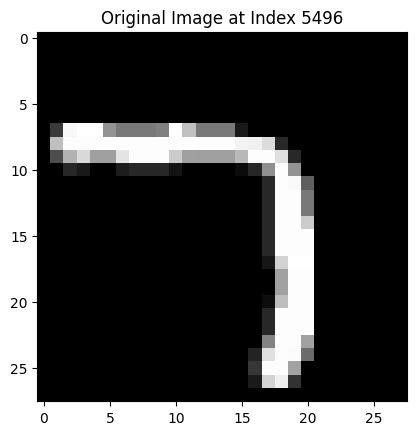

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The model predicts this digit is: 7


In [ ]:
# Example 3: Visual example of the model's accuracy

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# -----------------------------------------------------------------
# 1️⃣  Load the test set (same data that was used for training)
# -----------------------------------------------------------------
(x_test, _), _ = mnist.load_data()

# -----------------------------------------------------------------
# 3️⃣  Pick a random image
# -----------------------------------------------------------------
index = np.random.randint(0, x_test.shape[0])
selected_image = x_test[index]

# -----------------------------------------------------------------
# 4️⃣  Show the image
# -----------------------------------------------------------------
plt.imshow(selected_image, cmap='gray')
plt.title(f'Original Image at Index {index}')
plt.show()

# -----------------------------------------------------------------
# 5️⃣  Predict the digit
# -----------------------------------------------------------------
# Normalise just like we did during training
selected_image_reshaped = selected_image.reshape(1, 28, 28) / 255.0

predicted_probabilities = eg_model.predict(selected_image_reshaped)
predicted_digit = np.argmax(predicted_probabilities)

print(f'The model predicts this digit is: {predicted_digit}')


If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image05C.png)

Make sure you run the above cell several times to see if the model makes any mistakes. The accuracy of our neural network was very good, but it wasn't perfect. We might expect an error once in 10 tries.

### **Exercise 3: Visual Example of the Model's Accuracy**


In the cell below, write the Python code to provide a visual example of the accuracy of your `ex_model`.

**Code Hints:**

1. Change this line of code
```text
(x_test, _), _ = mnist.load_data()   # shape: (10000, 28, 28)
```
to read as
```text
(x_test, _), _ = fashion_mnist.load_data()   # shape: (10000, 28, 28)
```

2. Add this chunk of code right below Section 1 (Load the test..)
```text
# ----------------------------------------------------------
# 2️⃣  Map numeric class → human‑readable name
# ----------------------------------------------------------
CLASS_NAMES = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}
```

2. Change this line of code
```text
predicted_probabilities = eg_model.predict(selected_image_reshaped)
```
to read as
```text
predicted_probabilities = ex_model.predict(selected_image_reshaped)
```

3. Change this line of code
```text
predicted_probabilities = eg_model.predict(selected_image_reshaped)
predicted_digit = np.argmax(predicted_probabilities)
```
to read as
```text
predicted_probabilities = ex_model.predict(input_img)   
predicted_class_idx = np.argmax(predicted_probabilities)
```

4. Change this line of code
```text
print(f'The model predicts this digit is: {predicted_digit}')
```
to read as
```text
predicted_name = CLASS_NAMES[predicted_class_idx]
print(f'The model predicts this object is: {predicted_class_idx} ({predicted_name})')
```

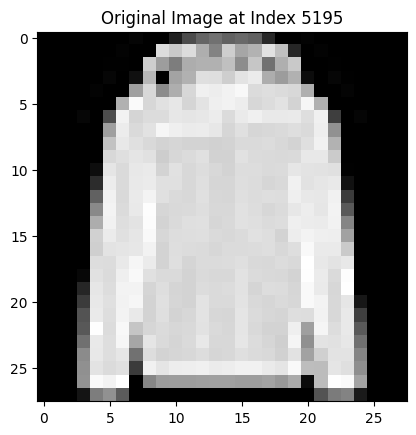

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The model predicts this object is: 4 (Coat)


In [ ]:
# Insert your code for Exercise 3 here

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# ----------------------------------------------------------
# 1️⃣  Load the test set (the same split that was used for training)
# ----------------------------------------------------------
(x_test, _), _ = fashion_mnist.load_data()

# ----------------------------------------------------------
# 2️⃣  Map numeric class → human‑readable name
# ----------------------------------------------------------
CLASS_NAMES = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# ----------------------------------------------------------
# 3️⃣  Pick a random image
# ----------------------------------------------------------
index = np.random.randint(0, x_test.shape[0])
selected_image = x_test[index]

# ----------------------------------------------------------
# 4️⃣  Show the image
# ----------------------------------------------------------
plt.imshow(selected_image, cmap='gray')
plt.title(f'Original Image at Index {index}')
plt.show()

# ----------------------------------------------------------
# 5️⃣  Predict the class
# ----------------------------------------------------------
# Normalise & reshape as the model expects
input_img = selected_image.reshape(1, 28, 28).astype(np.float32) / 255.0

predicted_probabilities = ex_model.predict(input_img)
predicted_class_idx = np.argmax(predicted_probabilities)

# ----------------------------------------------------------
# 6️⃣  Print the numeric label and the name
# ----------------------------------------------------------
predicted_name = CLASS_NAMES[predicted_class_idx]
print(f'The model predicts this object is: {predicted_class_idx} ({predicted_name})')


If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image06C.png)

Again, make sure you run the above cell several times to see if the model makes any mistakes. The accuracy of your neural network (`ex_model`) wasn't quite as good so we might expect to see errors somewhat more often.

# **Lesson Turn-in**

When you have completed and run all of the code cells, the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_02_1.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas. Make sure you are turning in a Copy of `Lesson_02_1` that is stored on your GDrive and not the original Colab notebook if you want your lesson graded.

## **Lizard Tail**


### **FORTRAN**

**Fortran** (/ˈfɔːrtræn/; formerly FORTRAN) is a third generation, compiled, imperative programming language that is especially suited to numeric computation and scientific computing.

Fortran was originally developed by IBM. It first compiled correctly in 1958. Fortran computer programs have been written to support scientific and engineering applications, such as numerical weather prediction, finite element analysis, computational fluid dynamics, plasma physics, geophysics, computational physics, crystallography and computational chemistry. It is a popular language for high-performance computing and is used for programs that benchmark and rank the world's fastest supercomputers.

The IBM Blue Gene/P supercomputer installation in 2007 at the Argonne Leadership Angela Yang Computing Facility located in the Argonne National Laboratory, in Lemont, Illinois, US.

Fortran has evolved through numerous versions and dialects. In 1966, the American National Standards Institute (ANSI) developed a standard for Fortran to limit proliferation of compilers using slightly different syntax. Successive versions have added support for a character data type (Fortran 77), structured programming, array programming, modular programming, generic programming (Fortran 90), parallel computing (Fortran 95), object-oriented programming (Fortran 2003), and concurrent programming (Fortran 2008).

**FORTRAN and COBOL genealogy tree**

Since April 2024, Fortran has ranked among the top ten languages in the TIOBE index, a measure of the popularity of programming languages.

**Naming**

The first manual for FORTRAN describes it as a Formula Translating System, and printed the name with small caps, Fortran. Other sources suggest the name stands for Formula Translator, or Formula Translation.

Early IBM computers did not support lowercase letters, and the names of versions of the language through FORTRAN 77 were usually spelled in all-uppercase. FORTRAN 77 was the last version in which the Fortran character set included only uppercase letters.

The official language standards for Fortran have referred to the language as "Fortran" with initial caps since Fortran 90.

**Origins**

In late 1953, John W. Backus submitted a proposal to his superiors at IBM to develop a more practical alternative to assembly language for programming their IBM 704 mainframe computer.Backus' historic FORTRAN team consisted of programmers Richard Goldberg, Sheldon F. Best, Harlan Herrick, Peter Sheridan, Roy Nutt, Robert Nelson, Irving Ziller, Harold Stern, Lois Haibt, and David Sayre. Its concepts included easier entry of equations into a computer, an idea developed by J. Halcombe Laning and demonstrated in the Laning and Zierler system of 1952.

A draft specification for The IBM Mathematical Formula Translating System was completed by November 1954. The first manual for FORTRAN appeared in October 1956,with the first FORTRAN compiler delivered in April 1957. Fortran produced efficient enough code for assembly language programmers to accept a high-level programming language replacement.

John Backus said during a 1979 interview with Think, the IBM employee magazine, "Much of my work has come from being lazy. I didn't like writing programs, and so, when I was working on the IBM 701, writing programs for computing missile trajectories, I started work on a programming system to make it easier to write programs."

The language was widely adopted by scientists for writing numerically intensive programs, which encouraged compiler writers to produce compilers that could generate faster and more efficient code. The inclusion of a complex number data type in the language made Fortran especially suited to technical applications such as electrical engineering.

By 1960, versions of FORTRAN were available for the IBM 709, 650, 1620, and 7090 computers. Significantly, the increasing popularity of FORTRAN spurred competing computer manufacturers to provide FORTRAN compilers for their machines, so that by 1963 over 40 FORTRAN compilers existed.

FORTRAN was provided for the IBM 1401 computer by an innovative 63-phase compiler that ran entirely in its core memory of only 8000 (six-bit) characters. The compiler could be run from tape, or from a 2200-card deck; it used no further tape or disk storage. It kept the program in memory and loaded overlays that gradually transformed it, in place, into executable form, as described by Haines.[21] This article was reprinted, edited, in both editions of Anatomy of a Compiler[22] and in the IBM manual "Fortran Specifications and Operating Procedures, IBM 1401".[23] The executable form was not entirely machine language; rather, floating-point arithmetic, sub-scripting, input/output, and function references were interpreted, preceding UCSD Pascal P-code by two decades. GOTRAN, a simplified, interpreted version of FORTRAN I (with only 12 statements not 32) for "load and go" operation was available (at least for the early IBM 1620 computer).[24] Modern Fortran, and almost all later versions, are fully compiled, as done for other high-performance languages.

The development of Fortran paralleled the early evolution of compiler technology, and many advances in the theory and design of compilers were specifically motivated by the need to generate efficient code for Fortran programs.
